Idea is that we couple rows accorded to function values and its derivative. Then let all matrix consist of non-interchanging ${2 \times 2}$ blocks. And consider these blocks as original elements. Lets state for that case: We call $r \times r$ submatrix $\hat A$ of rectangular $N  \times r$ full rank matrix $A$ dominant, if all the coupled ${2 \times 2}$ entries of $C$ have determinant not greater than 1 in modulus. And so if we manage to find such entry, say, $c(C)$ that $det|c| > 1$, we can construct new submatrix with volume larger than volume of current top submatrix (for example, by swapping couple of rows) and place it in the top of matrix $A$. It is asked to feed algorithm with preprocessed matrix, containing rows in specific pairs. Then change these couple of rows one by one with SWM formula, if block with determinant module more than 1 found. 

In [8]:
import numpy as np
from maxvolpy.maxvol import maxvol
from numpy.polynomial import Chebyshev as T
import numpy.linalg as la
import matplotlib.pyplot as plt
import blocked_maxvol
%matplotlib inline

In [17]:

# this function approximates set of points (arr, rhs) with linear combination of either Chebyshev polynomials or monomials
'''
Input:
x – all the points
f – right hand side values f(x)
degree – highest degree of appr polynomial
dom – interval of x
'''
def approx(arr, rhs, degree, dom):
    num_of_points = degree + 1
    
    A = np.zeros((2*len(arr), num_of_points), dtype = np.float64) # Matrix of function values
    
    for j in range(num_of_points):
        for i in np.arange(0, 2*len(arr), 2):
            A[i, j] = T.basis(j)(arr[i/2])
            #A[i + 1, j] = np.polynomial.chebyshev.chebval(arr[i/2], np.array(T.basis(j).deriv().coef))
            A[i + 1, j] = T.basis(j).deriv(1)(arr[i/2])
    #np.set_printoptions(precision=2)
    #print(A,'\n', A.shape, np.linalg.matrix_rank(A)) 
    print(A.shape,'\n', np.linalg.matrix_rank(A)) 
    
    row_indx = np.sort(blocked_maxvol.block_maxvol(A))
        
    # solution 
    c = np.linalg.solve(A[row_indx], rhs[row_indx])
    f_appr = np.polynomial.chebyshev.chebval(arr, c)  
    
    print(arr.shape, f_appr.shape, rhs.shape, row_indx.shape)
    
    row_indx = [int(row_indx[i]/2) for i in range(len(row_indx))] 
    print (row_indx[::2])
    
    # draw
    plt.plot(arr, rhs[::2], 'b', arr, f_appr, 'r--', arr[row_indx[::2]], rhs[row_indx[::2]], 'go')
    plt.grid()

    plt.show()
    
    # error
    print('Error_'  ' = ', la.norm(rhs[::2] - f_appr, 2) / la.norm(rhs[::2], 2))

/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(1200, 10) 
 10


/home/glebsg/Documents/EMMA/maxvol-approximation/blocked_maxvol.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  det = np.zeros([y/2,x/2])
/home/glebsg/Documents/EMMA/maxvol-approximation/blocked_maxvol.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  det[i/2, j/2] = np.linalg.det(temp_mat)


[   0    1    2    3 1000 1001 1040 1041    8    9]
(600,) (600,) (1200,) (10,)
[0, 1, 4, 500, 520]


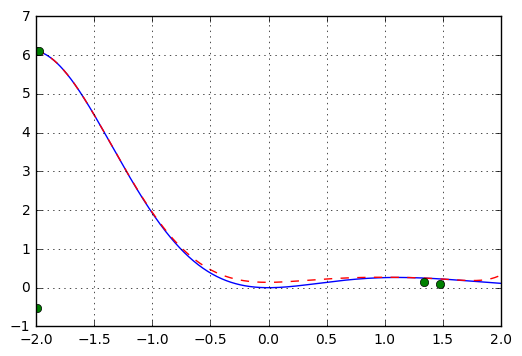

Error_ =  0.0306856255221


In [18]:
# let's test our approx function here
n = 600     # number of sampling points   
deg = 9      # degree of polynomial          
interval = [-2, 2]  # interval of x
x = np.linspace(interval[0], interval[1], n, dtype=np.float64) 
#f = 1/(x**2 + 1)  # function we want to approximate
# f = 2x^5 - 5x^4 + 2x - 1
# f' = 10x^4 - 20x^3 + 2
f = np.zeros(2*len(x), dtype=np.float64)
for cou in np.arange(0, 2*len(x), 2):
    #f[cou] = 2*x[cou/2]**7 - 5*x[cou/2]**4 + 2*x[cou/2] - 1
    #f[cou + 1] = 14*x[cou/2]**6 - 20*x[cou/2]**3 + 2
    #f[cou] = 1/(x[cou/2]**2 + 1)
    #f[cou+1] = -2*x[cou/2]/((x[cou/2]**2 + 1)**2)
    f[cou] = np.exp(-x[cou/2])*(np.sin(x[cou/2]))**2
    f[cou + 1] = np.exp(-x[cou/2])*np.sin(x[cou/2])*(2*np.cos(x[cou/2]) - np.sin(x[cou/2]))

approx(x, f, degree = deg, dom = interval)
